# Notebook n.3 
### NYC complaints 311 Calls

In this notebook you are asked to perform data analysis on a dataset of calls to 311 (municipal calls, not emergency) in the New York City area.

Get the data:
   * A compressed smaller version (~100 MB compressed) can be found [here](https://bit.ly/3b7yATT)
   * If you want (and have enough memory on your laptop), you can download the original data from [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) (11Gb+... Go to Export -> CSV).

## Instructions:
   * The small dataset is enough to finish this notebook.
   * For each question, add as many code cells as you need, as well as Markdown cells to explain your thought process and answer in text to the questions (where needed).

In [1]:
# Run this cell to import commonly used modules
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)  # large and nice

### <a id="point1">1.</a> Load the `csv` file into a `pandas.dataframe` called `complaints`

In [2]:
complaints = pd.read_csv("311_small.csv")

/home/joris/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (8,31,32,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 2. Basic overview

   * How many rows?
   * How many columns?
   * Type of each column
   * Number of unique values per column
   * Show the first 5 rows
   * [Earlier](#point1) you probably received a warning. If so, why? Investigate (type mismatch, nans, ...)

In [3]:
print(f"--> Number of rows: {complaints.shape[0]}")

--> Number of rows: 999999


In [4]:
print(f"--> Number of columns: {complaints.shape[1]}")


--> Number of columns: 41


In [5]:
print(f"--> Type of each column:\n{complaints.dtypes}")


--> Type of each column:
Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community

In [6]:
print(f"--> Number of unique values per column:\n{complaints.nunique()}")

--> Number of unique values per column:
Unique Key                        999999
Created Date                      776536
Closed Date                       400907
Agency                                29
Agency Name                          503
Complaint Type                       253
Descriptor                          1194
Location Type                        147
Incident Zip                         748
Incident Address                  301977
Street Name                        13127
Cross Street 1                     14936
Cross Street 2                     15088
Intersection Street 1               9567
Intersection Street 2              10199
Address Type                           6
City                                 324
Landmark                            2597
Facility Type                          4
Status                                 9
Due Date                          376211
Resolution Description               903
Resolution Action Updated Date    399139
Community Board  

In [7]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38039130,12/28/2017 02:07:27 AM,01/25/2018 04:14:40 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11226,2709 CLARENDON ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643087,-73.951445,"(40.64308690933735, -73.95144450750576)"
1,30967332,06/29/2015 12:36:20 PM,07/15/2015 05:09:55 PM,HPD,Department of Housing Preservation and Develop...,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38039132,12/28/2017 11:52:50 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Residential Building,11211,201 SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710881,-73.960160,"(40.71088069563202, -73.96016023399284)"
3,38039134,12/28/2017 10:55:57 AM,01/03/2018 09:32:26 AM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,10032,533 WEST 158 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833931,-73.942611,"(40.83393089963924, -73.94261063910199)"
4,38039147,12/28/2017 05:45:06 PM,01/02/2018 02:00:17 PM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,10303,6 MACORMAC PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636605,-74.168744,"(40.63660544008755, -74.16874421913744)"


**Warning ?**\
Yes, I had the following warning:
```
/home/joris/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (8,31,32,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  ```

It seems to be because some columns have multiple dtypes. Let's investigate further.


In [8]:
complaints = pd.read_csv("311_small.csv", low_memory=False)

In [9]:
# Compute the proportion of rows that are NA for these columns
complaints.iloc[:, [8,31,32,34,35,36,37]].isna().sum() / complaints.shape[0] # almost everything is NA, except for columns `Incident Zip`

Incident Zip                0.088509
Vehicle Type                0.999921
Taxi Company Borough        0.999183
Bridge Highway Name         0.997758
Bridge Highway Direction    0.997773
Road Ramp                   0.997796
Bridge Highway Segment      0.997207
dtype: float64

In [10]:
inc_zip = complaints.iloc[:,8].copy()
print(f"--> Types in the Incident Zip column: {set(type(e) for e in inc_zip.unique())}")
print(f"--> Number of unique values in Incident Zip: {inc_zip.nunique(dropna=False)}")
print(f"--> Number of unique values of type string: {len(set(e for e in inc_zip.unique() if type(e) == str))}")
print(f"--> Number of unique values of type float: {len(set(e for e in inc_zip.unique() if type(e) == float))}")

# What is the only float value ?
print(f"--> Only float value: {set(e for e in inc_zip.unique() if type(e) == float)}")

--> Types in the Incident Zip column: {<class 'str'>, <class 'float'>}
--> Number of unique values in Incident Zip: 481
--> Number of unique values of type string: 480
--> Number of unique values of type float: 1
--> Only float value: {nan}


We saw that the type issue arose because the NA's in the Incident Zip column are of type `float`, whereas the other values are of type `str`.

### 3. Show the top 10 rows for attributes `Complaint Type` and `Borough`

In [11]:
for col in ["Complaint Type", "Borough"]:
    print(f"--> Top 10 most common attributes in column {col}: {complaints[col].value_counts(ascending=False).iloc[:10].index}")
# Note that there are less that 10 values for the column `Borough`

--> Top 10 most common attributes in column Complaint Type: Index(['HEAT/HOT WATER', 'Noise - Residential',
       'General Construction/Plumbing', 'Illegal Parking',
       'Request Large Bulky Item Collection', 'Blocked Driveway',
       'Street Condition', 'Water System', 'Street Light Condition',
       'UNSANITARY CONDITION'],
      dtype='object')
--> Top 10 most common attributes in column Borough: Index(['BROOKLYN', 'QUEENS', 'BRONX', 'MANHATTAN', 'STATEN ISLAND',
       'Unspecified'],
      dtype='object')


### 4. How many distinct `Complaint Type` are there?
   * Count them and show them

In [12]:
compl_counts = complaints["Complaint Type"].value_counts()
print(f"--> All complaint types, with their respective counts:\n{compl_counts}")
print(f"--> So in total, there are {len(compl_counts)} distinct complaints (and {compl_counts.isna().sum()} NA).")

--> All complaint types, with their respective counts:
HEAT/HOT WATER                         124358
Noise - Residential                     83272
General Construction/Plumbing           57295
Illegal Parking                         56634
Request Large Bulky Item Collection     54515
                                        ...  
Advocate - Lien                             1
Peeling Paint                               1
Select Message Type...                      1
Home Repair                                 1
Injured Wildlife                            1
Name: Complaint Type, Length: 253, dtype: int64
--> So in total, there are 253 distinct complaints (and 0 NA).


### <a id="point5">5.</a> Clean `all` lines where `Complaint Type` contains the keyword `"Misc."` 
   * How many lines are dropped?

In [13]:
mask = complaints["Complaint Type"].str.contains("Misc.")
print(f"{mask.sum()} lines will be dropped")

19 lines will be dropped


In [14]:
complaints = complaints[~mask]

#### From now on, use the dataframe resulting from point [5](#point5)

### <a id="point6">6.</a> Count the number of `Complaint Type`
   * Show the top 10 most popular complaint types.
   * Plot the histogram of the 10 most popular complaint types.

<BarContainer object of 10 artists>

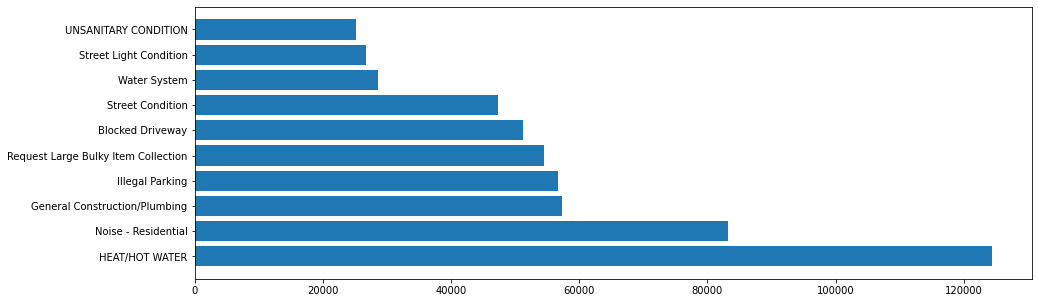

In [15]:
top_comp_type = complaints.value_counts("Complaint Type").index[:10]
mask = complaints["Complaint Type"].isin(top_comp_type)
index = complaints[mask].value_counts("Complaint Type").index
val = complaints[mask].value_counts("Complaint Type").values
plt.barh(index, val) # will plot bar plot since data is categorical

### 7. Extract all the rows with the Top 1 Complaint Type into a new dataframe
   * Top 1 Complaint Type is the single most popular Complaint Type found in [the previous question](#point6) (from now on `Top1`)
   * Show the top 3 rows of the new dataframe
   * What is the relation between the Top1 Complaint Type and different boroughs?
      * Leave out eventual unspecified data
      * Find the data distribution (i.e., count them)
      * Plot the histogram of the ratio of Top1 over all complaints, per borough.

In [16]:
top1_complaint = complaints.value_counts("Complaint Type").index[0]
print(f"Top1 complaint: {top1_complaint}")

df_top1 = complaints[complaints["Complaint Type"] == top1_complaint]
df_top1 = df_top1[complaints["Borough"] != "Unspecified"] # leave unspecified data
df_top1.head(3)

Top1 complaint: HEAT/HOT WATER


/tmp/ipykernel_7372/2689825861.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top1 = df_top1[complaints["Borough"] != "Unspecified"] # leave unspecified data


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38039130,12/28/2017 02:07:27 AM,01/25/2018 04:14:40 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11226,2709 CLARENDON ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643087,-73.951445,"(40.64308690933735, -73.95144450750576)"
67,38039226,12/28/2017 06:34:15 AM,12/28/2017 09:26:20 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11233,1924 PROSPECT PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.672241,-73.912317,"(40.672240762922904, -73.9123167627338)"
77,38039238,12/28/2017 12:58:15 AM,12/28/2017 02:08:17 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10472,1030 BOYNTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825023,-73.877378,"(40.8250227912721, -73.87737784124917)"


Borough
BRONX            40419
BROOKLYN         38810
MANHATTAN        27572
QUEENS           16362
STATEN ISLAND     1194
dtype: int64

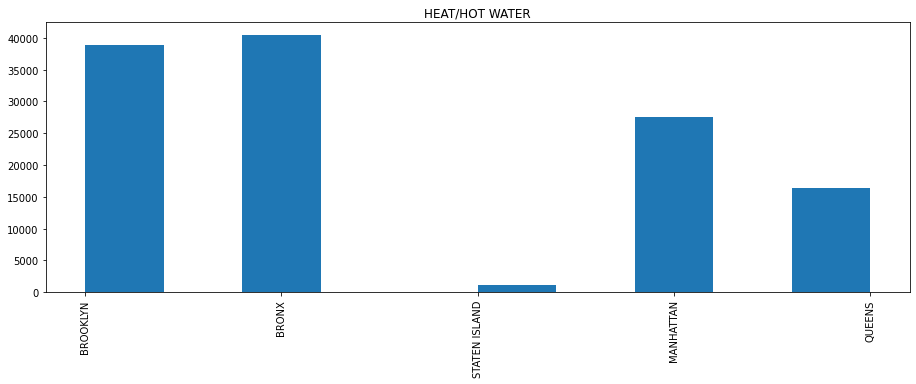

In [17]:
df_top1.hist("Borough", "Complaint Type")
df_top1.value_counts("Borough")

<BarContainer object of 5 artists>

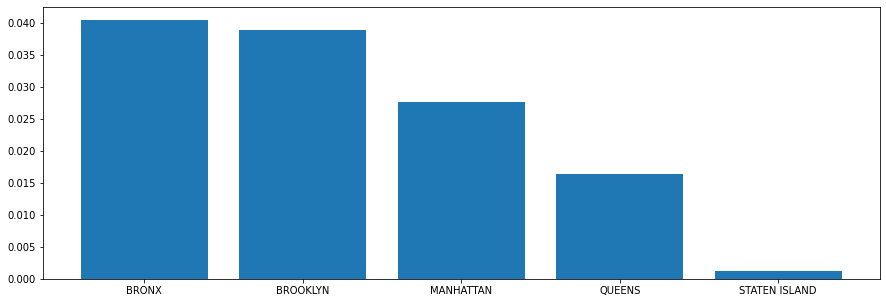

In [18]:
ratio = df_top1.value_counts("Borough") / complaints.shape[0]
plt.bar(ratio.index, ratio.values)